# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.

### First, download the data from: https://www.kaggle.com/ntnu-testimon/paysim1. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?
### Note: don't use the entire dataset, use a sample instead, with n=100000 elements, so your computer doesn't freeze.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
ds = pd.read_csv("C:/Users/tvpia/Desktop/FORKS WEEK 8/lab-imbalance/PS_20174392719_1491204439457_log.csv").sample(n=100000)

In [3]:
ds.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
280253,15,CASH_OUT,253296.54,C943524300,0.00,0.00,C1217400138,881476.47,1507214.22,0,0
5936637,404,TRANSFER,678279.61,C1898467747,19942.00,0.00,C790719682,1398302.21,2076581.82,0,0
906778,43,CASH_OUT,210512.83,C493720710,0.00,0.00,C1385605900,495293.52,705806.35,0,0
3461404,257,CASH_OUT,126669.72,C913959451,0.00,0.00,C1987927825,2082180.18,2208849.90,0,0
1651066,158,CASH_IN,364529.63,C132724367,4846276.05,5210805.67,C537790602,2586533.14,2222003.51,0,0


In [4]:
ds.shape

(100000, 11)

In [5]:
ds.isFraud.value_counts()

0    99874
1      126
Name: isFraud, dtype: int64

In [6]:
ds.isFlaggedFraud.value_counts()

0    100000
Name: isFlaggedFraud, dtype: int64

### What is the distribution of the outcome? 

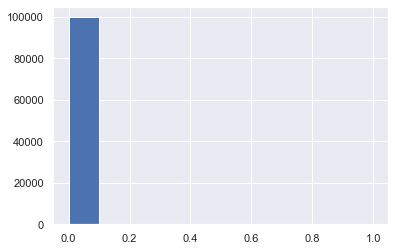

In [12]:
ds.isFraud.hist()
#too few fraudulent accounts to visualize in an histogram

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [13]:
# Your code here
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 2390455 to 2683329
Data columns (total 11 columns):
step              100000 non-null int64
type              100000 non-null object
amount            100000 non-null float64
nameOrig          100000 non-null object
oldbalanceOrg     100000 non-null float64
newbalanceOrig    100000 non-null float64
nameDest          100000 non-null object
oldbalanceDest    100000 non-null float64
newbalanceDest    100000 non-null float64
isFraud           100000 non-null int64
isFlaggedFraud    100000 non-null int64
dtypes: float64(5), int64(3), object(3)
memory usage: 9.2+ MB


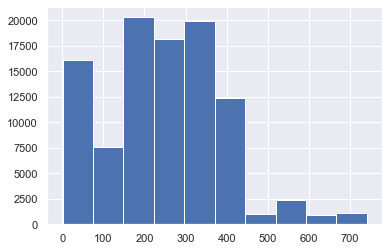

In [15]:
ds.step.hist()

In [ ]:
#it represents a number of days?
#I think time frame is relevant here and I dont want to drop it

In [7]:
#lets drop the name columns since it is not bringing relevant information and may cause missclassifying later on
ds.drop(columns=["nameOrig","nameDest"],axis=1,inplace=True)

In [8]:
#lets also drop is flagged fraud since all the values are zeros

In [9]:
ds.drop(columns="isFlaggedFraud",axis=1,inplace=True)

In [10]:
ds.type.value_counts()
#only a few values, lets encode it

CASH_OUT    35065
PAYMENT     34051
CASH_IN     22059
TRANSFER     8167
DEBIT         658
Name: type, dtype: int64

In [11]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label= ["type"]
ds[label]=ds[label].apply(le.fit_transform)


In [16]:
#the dataset is now cleaned
ds.loc[ds.step == 0]
ds.dtypes

step                int64
type                int32
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
dtype: object

### Run a logisitc regression classifier and evaluate its accuracy.

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X=ds.drop(columns="isFraud",axis=1)
y=ds.isFraud

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=67)

model = LogisticRegression()
model.fit(X_train,y_train)

C:\Users\tvpia\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\tvpia\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
from sklearn.metrics import f1_score, confusion_matrix, precision_score, recall_score, accuracy_score

model.score(X_test,y_test)

0.9996

In [19]:
#lets make a deeper evaluation

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
ac = accuracy_score(y_test, y_pred)
pr = precision_score(y_test, y_pred)
rc = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('accuracy:', ac, 'precision:', pr, 'recall:', rc, 'F1:', f1)

accuracy: 0.9996 precision: 0.9047619047619048 recall: 0.76 F1: 0.8260869565217391


### Now pick a model of your choice and evaluate its accuracy.

In [49]:
#just trying out some resmampling with resample and smote, won't use it later
from sklearn.utils import resample

df_majority=ds.loc[ds.isFraud == 0]
df_minority = ds.loc[ds.isFraud == 1]

df_minority_upsampled = resample(df_minority, 
                                 replace=True,     
                                 n_samples=99000,    
                                 random_state=67) 
df_train = pd.concat([df_majority, df_minority_upsampled])


# Display new class counts
print (df_train.isFraud.value_counts())



0    99861
1    99000
Name: isFraud, dtype: int64


In [46]:
from imblearn.over_sampling import SMOTE
import numpy as np
sm = SMOTE(random_state=67)
x_train_res, y_train_res = sm.fit_sample(X_train, y_train)
print (y_train.value_counts() , np.bincount(y_train_res))

#Smote resample our data but it is still too imbalanced

0    79883
1      117
Name: isFraud, dtype: int64 [79883 79883]


In [20]:
#lets try the randomforest classifier model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=67)

model = RandomForestClassifier()
model.fit(X_train , y_train)




C:\Users\tvpia\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [21]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
ac = accuracy_score(y_test, y_pred)
pr = precision_score(y_test, y_pred)
rc = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('accuracy:', ac, 'precision:', pr, 'recall:', rc, 'F1:', f1)

accuracy: 0.9998 precision: 1.0 recall: 0.84 F1: 0.9130434782608696


In [22]:
cm
#this model is better for every evaluation metric

array([[19975,     0],
       [    4,    21]], dtype=int64)

### Which model worked better and how do you know?

In [53]:
#the random forrest classifier worked the best (as seen on the evaluation metrics). We could still try to
#improve it by changing the max_depth and the n-estimators parameters

0.99965

### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.